In [1]:
#By Steve Fitzel July 2020
import numpy as np
import pandas as pd
from scipy.interpolate import splprep, splev
from scipy.interpolate import splrep
import matplotlib.pyplot as plt
import mayavi.mlab as mplt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mplt.figure("Pursuit Technologies 3D Wellbore Viewer",bgcolor=(.43,.63,.63))

In [3]:
#read in files
surv = pd.read_excel('C:/Users/Pursuit/.edm/Directional Dogleg.xlsx')
press = pd.read_csv('C:/Users/Pursuit/.edm/5.csv')
tally=pd.read_excel('C:/Users/Pursuit/Documents/MSET Data/Groundbirch/Groundbirch casing tally 2.xlsx')

In [4]:
#Fix up casing tally
tally=tally.sort_values('Top',ascending=True)
tally = tally[tally['Top'] >= 0] #get rid of neagative depth at top
tally = tally.reset_index(drop=True) #re-order from top to bottom
#tally=tally.round(1)
tally=tally.round({'Top': 1, 'Bot': 1,'Length': 2}) #use 2 decimals only for Length
tally.rename(columns = {'Bot':'Depth'}, inplace = True)
#tally['Length']=1

In [5]:
#print(tally)

In [6]:
#create a dataframe with evenly spaced depth interval of 0.1 
top=0
dlen=(len(tally))-1
bot=tally.at[dlen,'Depth']
all = np.arange(top, bot+.1, .1)

In [7]:
allData=pd.DataFrame(all,columns =['Depth']) #Label column
allData['Depth'] = allData['Depth'].map(lambda x: '%.1f' % x) #Fix to a single decimal point
allData['Depth']=allData['Depth'].astype(float) #convert from object to float

In [8]:
tally.to_csv('C:/Users/Pursuit/Documents/MSET Data/Groundbirch/tally 2.csv',index=False)

In [9]:
#prep Directional survey info

In [10]:
surv = surv[['Measured Depth','Vertical Depth','+N/S-','+E/W-']]

In [11]:
srv=surv.to_numpy() 

In [12]:
x = srv[:,2]
y = srv[:,3]
z = 1-srv[:,1]

In [13]:
smoothness = 3.0
spline_order = 3
nest = -1 # estimate of number of knots needed (-1 = maximal)
knot_points, u = splprep([x,y,z], s=smoothness, k=spline_order,nest=-1)

In [14]:
x_int, y_int, z_int = splev(np.linspace(0, 1, len(all)), knot_points)

In [15]:
srvData=pd.DataFrame({'x_int':x_int,'y_int':y_int,'z_int':z_int})

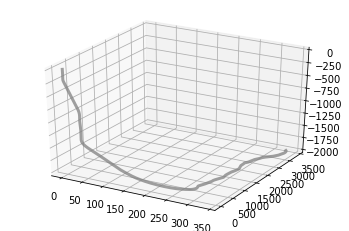

In [16]:
plt.gca(projection='3d')
plt.plot(x_int, y_int, z_int, color='grey', lw=3, alpha=0.75)
#plt.show()

In [17]:
allData = pd.concat([allData, srvData], axis = 1)

In [18]:
allData2=pd.merge(allData, tally,on='Depth',how='left') #merge tally into all Data

In [19]:
allData2.loc[:,'Length'] = allData2.loc[:,'Length'].bfill() #fill forward gaps in Length
allData2=allData2.fillna(-999.25) #replace null values with zero

In [20]:
result=[]
for value in allData2['Length']:
    if value == 1.06:
        result.append(.8)
    elif value == 1.88:  
        result.append(.6)
    elif value == .39:  
        result.append(.3)
    else:           
        result.append('0')
#        perf=result.index.values
allData2['Completion'] = result 
perf=allData2.loc[allData2['Completion'] != '0','Depth']
#for index, row in allData2.iterrows():
#    if (row['Length']) == 1.06:    
#        result.append(.8)
#        perf.append(row['Depth'])
#    elif value == 1.88:  
#        result.append(.6)
#        perf.append(row['Depth'])
#    elif value == .39:  
#        result.append(.3)
#        perf.append(row['Depth'])
#    else:           
#        result.append('0')
    # Create a column from the list


In [21]:
#perf2= perf.diff();
perf2=pd.DataFrame(perf,columns=['Depth'])
perf2['Diff']=perf.diff();
perf2=perf2.fillna(2) #Replace nan value with 2 to make work below
perf3=perf2.loc[perf2['Diff'] >= .15]

In [22]:
allData2.loc[allData2.Top != -999.25, 'Completion'] = 1
allData2['Completion']=allData2['Completion'].astype(float) #convert from object to float

In [23]:
allData2.to_csv('C:/Users/Pursuit/Documents/MSET Data/Groundbirch/Groundbirch tally complete.csv',index=False)

In [24]:
ad2=allData2.to_numpy() 

In [25]:
collars=ad2[:,6]
dpth=ad2[:,0]

In [26]:
for spot in perf3.index:
    xw=int(np.random.rand(1)*60)
    x1, y1, z1 = (ad2[spot,1]-100-xw, ad2[spot,2], ad2[spot,3]-5)  # | => pt1
    x2, y2, z2 = (ad2[spot,1]-100-xw,ad2[spot,2]+5, ad2[spot,3]-5)  # | => pt2
    x3, y3, z3 = (ad2[spot,1]-10, ad2[spot,2], ad2[spot,3]-5)  # | => pt3
    x4, y4, z4 = (ad2[spot,1]-10, ad2[spot,2]+5, ad2[spot,3]-5)  # | => pt4
    x5, y5, z5 = (ad2[spot,1]-100-xw, ad2[spot,2], ad2[spot,3]+5)  # | => pt5
    x6, y6, z6 = (ad2[spot,1]-100-xw, ad2[spot,2]+5, ad2[spot,3]+5)  # | => pt6
    x7, y7, z7 = (ad2[spot,1]-10, ad2[spot,2], ad2[spot,3]+5)  # | => pt7
    x8, y8, z8 = (ad2[spot,1]-10, ad2[spot,2]+5, ad2[spot,3]+5)  # | => pt8
    box=mplt.mesh([[x1, x2, x6], [x3, x4, x8], [x7, x8, x8],[x8, x6, x2], [x7, x5, x1], [x3, x1, x1]],
                 [[y1, y2, y6], [y3, y4, y8], [y7, y8, y8],[y8, y6, y2], [y7, y5, y1], [y3, y1, y1]],
                 [[z1, z2, z6], [z3, z4, z8], [z7, z8, z8],[z8, z6, z2], [z7, z5, z1], [z3, z1, z1]],
                 color=(1, 0, 0))  # red

In [27]:
mplt.plot3d(x_int, y_int, z_int, collars,tube_radius=3,tube_sides=16,colormap='CMRmap')
#mplt.plot3d(x_int, y_int, z_int, dpth,tube_radius=10,tube_sides=16,colormap='jet')
mplt.outline()
mplt.orientation_axes(xlabel='N/S', ylabel="E/W",zlabel="TVD")
mplt.points3d(x_int, y_int, z_int+20, dpth,mask_points=1000,scale_mode='none',scale_factor=6)
#mplt.scalarbar()
#mplt.labels()

In [28]:
#mplt.savefig('Completion boxes.obj')

In [29]:
mplt.show()

In [30]:
mplt.close(all=True)